In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
pipe_file = pd.read_csv("../../data/ppp_pipe23.csv", index_col=0)

/var/folders/vy/qdp8xcfj4s3dd5c6d1xp_y3w0000gn/T/ipykernel_6104/3459628991.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pipe_file = pd.read_csv("../../data/ppp_pipe23.csv", index_col=0)


District Check

In [3]:
pd.set_option('display.max_rows', 75)
pipe_file["SBAOfficeCode"].value_counts() #75 unique
pipe_file["SBAOfficeLabel"].value_counts() #74
cols = ["LoanNumber","SBAOfficeLabel", "SBAOfficeCode"]
sba_df = pipe_file[cols]
sba_df.groupby(["SBAOfficeLabel", "SBAOfficeCode"]).agg({"LoanNumber":'count'})

,,LoanNumber
SBAOfficeLabel,SBAOfficeCode,
ALABAMA DISTRICT OFFICE,459,10912
ALASKA DISTRICT OFFICE,1084,2662
ARIZONA DISTRICT OFFICE,988,15764
ARKANSAS DISTRICT OFFICE,669,5862
BALTIMORE DISTRICT OFFICE,373,12874
BOISE DISTRICT OFFICE,1087,3715
BUFFALO DISTRICT OFFICE,296,4733
CEDAR RAPIDS BRANCH OFFICE,736,3476
CLEVELAND DISTRICT OFFICE,549,15777


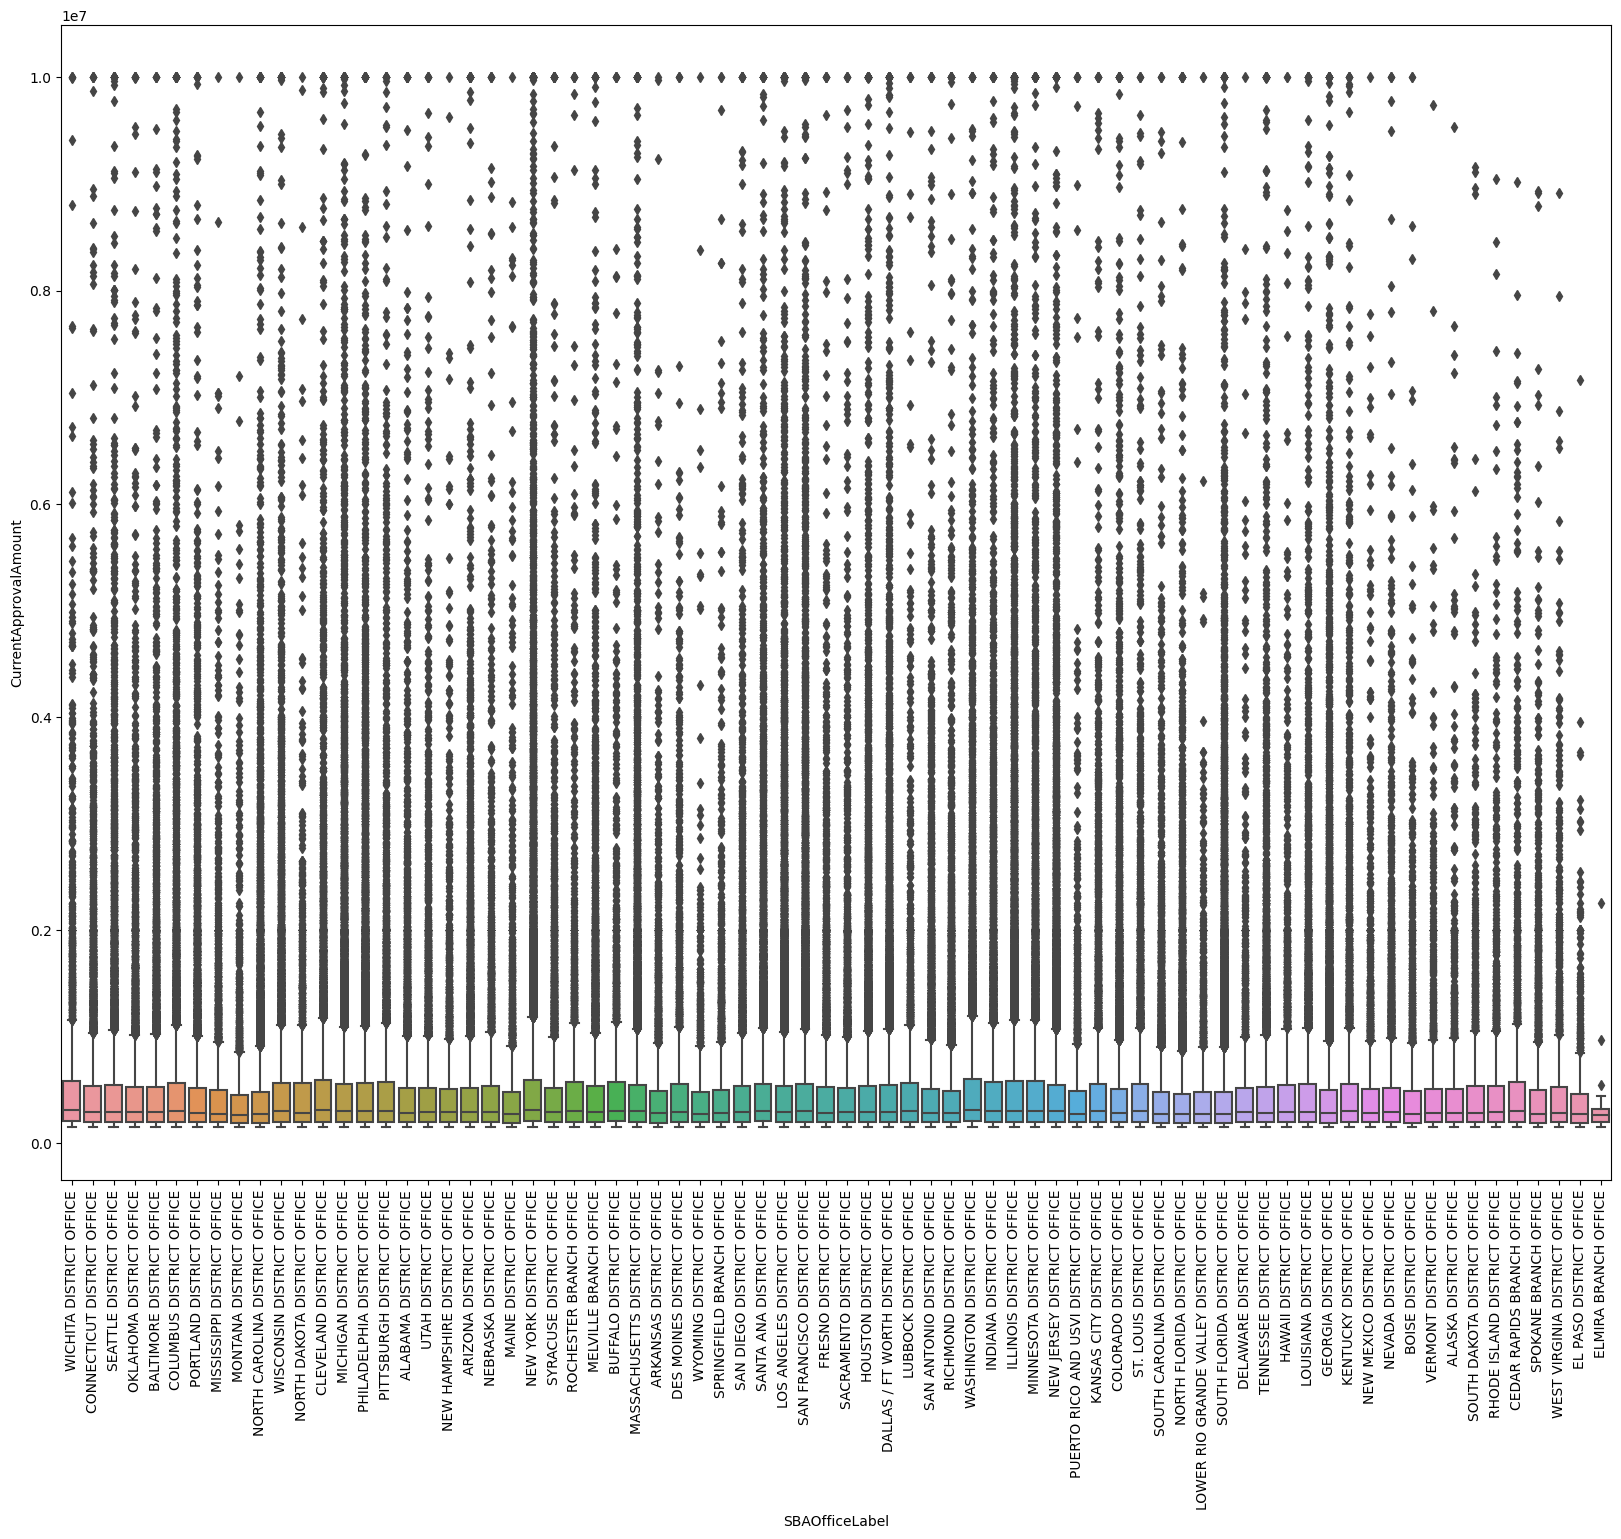

In [4]:
cols = ["LoanNumber","SBAOfficeLabel", "SBAOfficeCode", "CurrentApprovalAmount"]
sba_ca = pipe_file[cols]
sba_ca.groupby(["SBAOfficeLabel"]).agg({'CurrentApprovalAmount':'sum'})


plt.figure(figsize=(20,15))
sns.boxplot(y='CurrentApprovalAmount',x='SBAOfficeLabel',data = sba_ca.sort_values('CurrentApprovalAmount',ascending=False))
plt.xticks(rotation=90)
plt.show()

Borrower State

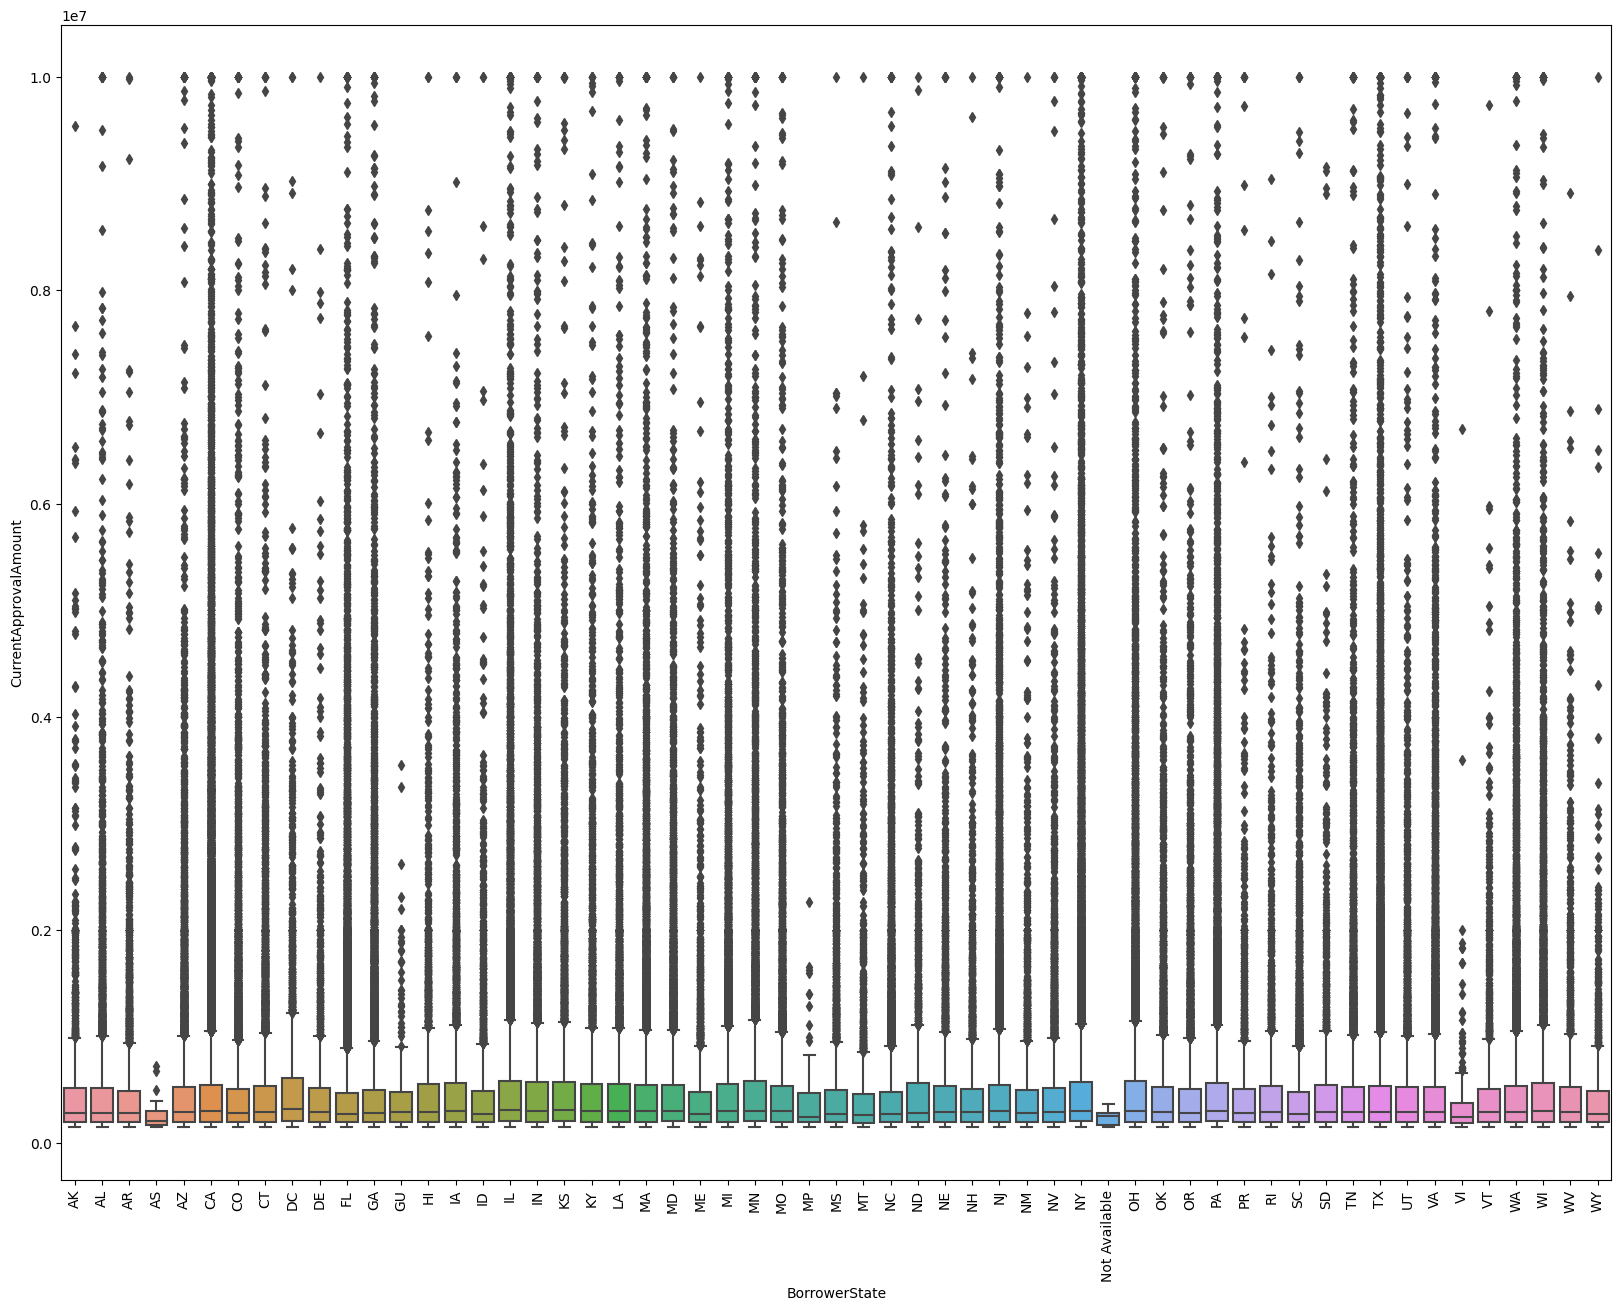

In [6]:
cols = ["LoanNumber","BorrowerState", "CurrentApprovalAmount"]
bs_ca = pipe_file[cols]



plt.figure(figsize=(20,15))
sns.boxplot(y='CurrentApprovalAmount',x='BorrowerState',data = bs_ca.sort_values('BorrowerState',ascending=True))
plt.xticks(rotation=90)
plt.show()

In [9]:
pd.options.display.float_format = '{:,.2f}'.format
bsgrp = bs_ca.groupby(["BorrowerState"]).agg({'LoanNumber':'count','CurrentApprovalAmount':'sum'})
bsgrp["AverageLoanAmount"] = bsgrp['CurrentApprovalAmount']/bsgrp['LoanNumber']
bsgrp.head(20)

,LoanNumber,CurrentApprovalAmount,AverageLoanAmount
BorrowerState,,,
AK,2662,"1,337,402,360.80","502,405.09"
AL,10912,"5,590,375,046.64","512,314.43"
AR,5857,"2,782,731,088.43","475,112.02"
AS,20,"5,637,092.33","281,854.62"
AZ,15757,"8,079,195,825.57","512,736.93"
CA,129086,"68,326,974,973.99","529,313.60"
CO,19669,"9,986,979,117.78","507,752.26"
CT,12882,"6,661,588,617.20","517,123.79"
DC,4383,"2,505,524,482.22","571,646.01"


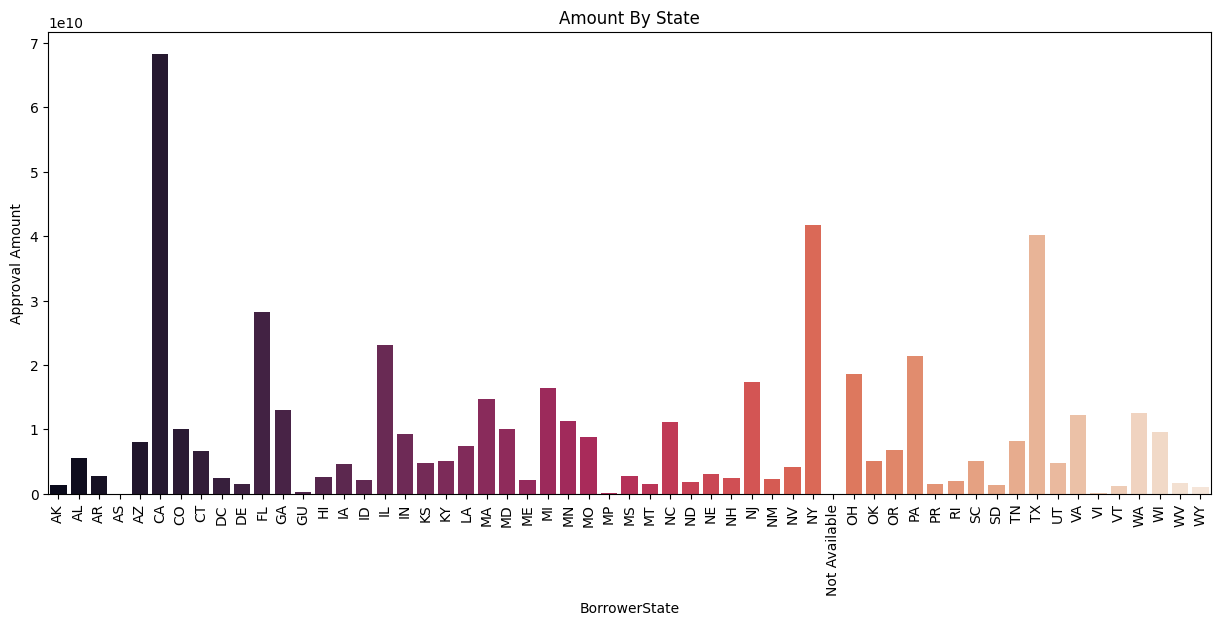

In [10]:
x = bsgrp.index
y = bsgrp["CurrentApprovalAmount"]
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("Amount By State")
plt.xlabel("BorrowerState")
plt.ylabel("Approval Amount")
plt.show()

Lender Check

In [11]:
pipe_file_slid = pipe_file['ServicingLenderLocationID'].nunique()
pipe_file_olid = pipe_file['OriginatingLenderLocationID'].nunique()
print("SL IDs", pipe_file_slid)
print("OL IDs", pipe_file_olid)
pipe_file_sln = pipe_file['ServicingLenderName'].nunique()
pipe_file_oln = pipe_file['OriginatingLender'].nunique()
print("SL Names", pipe_file_sln)
print("OL Names", pipe_file_oln)
pipe_file_sls = pipe_file['ServicingLenderState'].nunique()
pipe_file_ols = pipe_file['OriginatingLenderState'].nunique()
print("SL States", pipe_file_sls)
print("OL States", pipe_file_ols)

SL IDs 4632
OL IDs 4654
SL Names 4148
OL Names 4168
SL States 55
OL States 55


Servicing Lender

In [12]:
cols = ["LoanNumber",'ServicingLenderLocationID','ServicingLenderName','CurrentApprovalAmount','Estimated_LenderProfit']
sl_ca = pipe_file[cols]
sl_grp = sl_ca.groupby(['ServicingLenderName','ServicingLenderLocationID']).agg({"LoanNumber":'count', 'CurrentApprovalAmount':'sum', 'Estimated_LenderProfit':'sum'})
sl_grp["AverageLoanAmount"] = sl_grp['CurrentApprovalAmount']/sl_grp['LoanNumber']
sl_grp.head(20)

,,LoanNumber,CurrentApprovalAmount,Estimated_LenderProfit,AverageLoanAmount
ServicingLenderName,ServicingLenderLocationID,,,,
"\tYankee Farm Credit, ACA",529007,10,"5,175,424.12","138,873.92","517,542.41"
121 Financial Credit Union,94293,77,"29,051,350.00","1,065,115.50","377,290.26"
1st Advantage Bank,433128,49,"20,517,924.93","714,330.58","418,733.16"
1st Advantage FCU,107149,5,"1,511,384.68","61,753.99","302,276.94"
1st Bank Yuma,233059,79,"34,115,400.00","1,103,514.00","431,840.51"
1st Bank in Hominy,59003,5,"1,176,279.00","58,813.95","235,255.80"
1st Bank of Sea Isle City,87061,7,"1,410,000.00","70,500.00","201,428.57"
1st Bergen FCU,464550,2,"368,614.00","18,430.70","184,307.00"
1st Capital Bank,447232,242,"137,821,004.73","4,304,403.18","569,508.28"


Originatinng Lender

In [13]:
cols = ["LoanNumber",'OriginatingLenderLocationID','OriginatingLender','CurrentApprovalAmount','Estimated_LenderProfit']
ol_df = pipe_file[cols]
ol_grp = ol_df.groupby(['OriginatingLender','OriginatingLenderLocationID']).agg({"LoanNumber":'count', 'CurrentApprovalAmount':'sum', 'Estimated_LenderProfit':'sum'})
ol_grp["AverageLoanAmount"] = ol_grp['CurrentApprovalAmount']/ol_grp['LoanNumber']
ol_grp.head(20)

,,LoanNumber,CurrentApprovalAmount,Estimated_LenderProfit,AverageLoanAmount
OriginatingLender,OriginatingLenderLocationID,,,,
"\tYankee Farm Credit, ACA",529007,10,"5,175,424.12","138,873.92","517,542.41"
121 Financial Credit Union,94293,77,"29,051,350.00","1,065,115.50","377,290.26"
1st Advantage Bank,433128,49,"20,517,924.93","714,330.58","418,733.16"
1st Advantage FCU,107149,5,"1,511,384.68","61,753.99","302,276.94"
1st Bank Yuma,233059,79,"34,115,400.00","1,103,514.00","431,840.51"
1st Bank in Hominy,59003,5,"1,176,279.00","58,813.95","235,255.80"
1st Bank of Sea Isle City,87061,7,"1,410,000.00","70,500.00","201,428.57"
1st Bergen FCU,464550,2,"368,614.00","18,430.70","184,307.00"
1st Capital Bank,447232,242,"137,821,004.73","4,304,403.18","569,508.28"


In [14]:
sl_cols =  ['LoanNumber','ServicingLenderLocationID', 'ServicingLenderName','ServicingLenderState']
ol_cols =  ['LoanNumber','OriginatingLenderLocationID', 'OriginatingLender','OriginatingLenderState']
sl_df=pipe_file[sl_cols]
ol_df=pipe_file[ol_cols]

Lender Match

In [ ]:
a_key = pipe_file['LoanNumber'].astype(str) + pipe_file['ServicingLenderLocationID'].astype(str) + pipe_file['ServicingLenderName'].astype(str)
b_key = pipe_file['LoanNumber'].astype(str) + pipe_file['OriginatingLenderLocationID'].astype(str) + pipe_file['OriginatingLender'].astype(str)
pipe_file["LenderMatch"] = a_key.isin(b_key)

Where Servicing Lender != Originating Lender

In [16]:
LMcheck=pipe_file["LenderMatch"].value_counts()
print(LMcheck, "False = Number of Loans where Originating Lender does not match Service Lender")

LenderMatch
True     933803
False     31749
Name: count, dtype: int64 False = Number of Loans where Originating Lender does not match Service Lender


In [17]:
lm_df = pipe_file.loc[pipe_file["LenderMatch"] == False]
lm_df.head(20)

,LoanNumber,DateApprovedTS,SBAOfficeCode,SBAOfficeLabel,ProcessingMethod,BorrowerName,BorrowerState,LoanStatusDateTS,LoanStatus,Term,...,4DigitNAICS,NAICSCode,Industry,IndustrySubsector,TRIIndustrySector,Loan_Range,job_Range,LongName,full_add,LenderMatch
18,6732787302,20200430,1084,ALASKA DISTRICT OFFICE,PPP,"TYONEK GLOBAL SERVICES, LLC",AK,Not Available,Exemption 4,66,...,6114,611420,Educational Services,6114 Business Schools and Computer and Managem...,999 Other,e $5-10 million,250 to 499,Computer Training,"1689 C ST, ANCHORAGE, AK",False
19,6735557309,20200430,1084,ALASKA DISTRICT OFFICE,PPP,"TYONEK WORLDWIDE SERVICES, INC.",AK,Not Available,Exemption 4,60,...,4881,488190,Transportation and Warehousing,4881 Support Activities for Air Transportation,999 Other,e $5-10 million,20 to 49,Other Support Activities for Air Transportation,"1689 C ST, ANCHORAGE, AK",False
34,6733687309,20200430,1084,ALASKA DISTRICT OFFICE,PPP,"TYONEK MANUFACTURING GROUP, INC.",AK,Not Available,Exemption 4,60,...,5511,551112,Management of Companies and Enterprises,5511 Management of Companies and Enterprises,999 Other,d $2-5 million,250 to 499,Offices of Other Holding Companies,"1689 C ST, ANCHORAGE, AK",False
351,9428088408,20210217,1084,ALASKA DISTRICT OFFICE,PPS,TRIUMVIRATE LLC,AK,20220120,Paid in Full,60,...,7211,721199,Accommodation and Food Services,7211 Traveler Accommodation,999 Other,"b $350,000-1 million",20 to 49,All Other Traveler Accommodation,"3705 Arctic Blvd, Anchorage, AK",False
458,4752137304,20200430,1084,ALASKA DISTRICT OFFICE,PPP,TYONEK NATIVE CORPORATION,AK,20220312,Paid in Full,24,...,5419,541990,"Professional, Scientific, and Technical Services","5419 Other Professional, Scientific, and Techn...",999 Other,"b $350,000-1 million",20 to 49,"All Other Professional, Scientific, and Techni...","1689 C ST STE 219, ANCHORAGE, AK",False
522,9911267004,20200409,1084,ALASKA DISTRICT OFFICE,PPP,"TRIUMVIRATE, LLC",AK,20210617,Paid in Full,24,...,7139,713920,"Arts, Entertainment, and Recreation",7139 Other Amusement and Recreation Industries,999 Other,"b $350,000-1 million",10 to 19,Skiing Facilities,"3705 ARCTIC BLVD 429, ANCHORAGE, AK",False
526,2547797207,20200416,1084,ALASKA DISTRICT OFFICE,PPP,"5150 GLOBAL SOLUTIONS, LLC",AK,20210729,Paid in Full,24,...,8129,812990,Other Services (except Public Administration),8129 Other Personal Services,999 Other,"b $350,000-1 million",10 to 19,All Other Personal Services,"271 Park Ave, Wasilla, AK",False
836,6734817302,20200430,1084,ALASKA DISTRICT OFFICE,PPP,"TYONEK SERVICES OVERHAUL FACILITY - STENNIS, LLC",AK,20220412,Paid in Full,60,...,3345,334511,Manufacturing,"3345 Navigational, Measuring, Electromedical, ...",334 Computers and Electronic Products,"b $350,000-1 million",20 to 49,"Search, Detection, Navigation, Guidance, Aeron...","1689 C ST, ANCHORAGE, AK",False
837,6734157305,20200430,1084,ALASKA DISTRICT OFFICE,PPP,TYONEK SERVICES GROUP INC,AK,20220809,Paid in Full,60,...,5511,551112,Management of Companies and Enterprises,5511 Management of Companies and Enterprises,999 Other,"b $350,000-1 million",20 to 49,Offices of Other Holding Companies,"1689 C ST, ANCHORAGE, AK",False
906,1082347206,20200415,1084,ALASKA DISTRICT OFFICE,PPP,MAKAR EYECARE LLC,AK,20220218,Paid in Full,24,...,6213,621320,Health Care and Social Assistance,6213 Offices of Other Health Practitioners,999 Other,"b $350,000-1 million",20 to 49,Offices of Optometrists,"341 W TUDOR STE 101, ANCHORAGE, AK",False


In [18]:
cols=["LoanNumber","LenderMatch"]
match_cols_merge = lm_df[cols]
match_cols_merge.to_csv("../../data/process_data/LMcol23.csv")

In [19]:
print(lm_df['ServicingLenderName'].nunique())
print(lm_df['OriginatingLender'].nunique())

92
126


In [20]:
pd.options.display.float_format = '{:,.2f}'.format
cols = ["LoanNumber",'ServicingLenderLocationID','ServicingLenderName','OriginatingLender','CurrentApprovalAmount','Estimated_LenderProfit']
lm_ca = lm_df[cols]
lm_grp = lm_ca.groupby(['ServicingLenderName','ServicingLenderLocationID','OriginatingLender']).agg({"LoanNumber":'count', 'CurrentApprovalAmount':'sum', 'Estimated_LenderProfit':'sum'})
lm_grp["AverageLoanAmount"] = lm_grp['CurrentApprovalAmount']/lm_grp['LoanNumber']
lm_grp.head(20)

LoanNumber  \
ServicingLenderName                        ServicingLenderLocationID OriginatingLender                                       
AgSouth Farm Credit, ACA                   238223                    Carolina Farm Credit, ACA                           9   
American Lending Center                    530223                    The Enterprise Center Capital Corporation          92   
Amur Equipment Finance, Inc.               529652                    The Enterprise Center Capital Corporation          22   
Arizona Financial Credit Union             91374                     Horizon Community Bank                            158   
Bank of Ann Arbor                          119903                    First Merchants Bank                               22   
                                                                     First National Bank of Michigan                     1   
                                                                     Nicolet National Bank                             117   
Bank of Colorado                           15438                     Pinnacle Bank                                       2   
Bank of Prairie Village                    25947                     Bankers' Bank of Kansas                             4   
BayFirst National Bank                     123499                    Loan Source Incorporated                           34   
Capital Plus Financial, LLC                529472                    Hanmi Bank                                        215   
Carver Federal Savings Bank                87076                     American Express National Bank                      1   
Citizens Bank, National Association        434162                    HSBC Bank USA, National Association                14   
Community Banks of Colorado, A Division of 478121                    Bank of Jackson Hole Trust                        173   
Conway Bank                                25775                     Bankers' Bank of Kansas                             1   
Cross River Bank                           456756                    Kabbage, Inc.                                    1103   
Customers Bank                             121536                    Amur Equipment Finance, Inc.                      184   
                                                                     Leader Bank, National Association                 153   
                                                                     Readycap Lending, LLC                            3396   
                                                                     The Enterprise Center Capital Corporation          47   

                                                                                                                CurrentApprovalAmount  \
ServicingLenderName                        ServicingLenderLocationID OriginatingLender                                                  
AgSouth Farm Credit, ACA                   238223                    Carolina Farm Credit, ACA                           8,979,061.92   
American Lending Center                    530223                    The Enterprise Center Capital Corporation          54,007,541.99   
Amur Equipment Finance, Inc.               529652                    The Enterprise Center Capital Corporation           6,390,470.00   
Arizona Financial Credit Union             91374                     Horizon Community Bank                             56,836,493.17   
Bank of Ann Arbor                          119903                    First Merchants Bank                                6,927,584.00   
                                                                     First National Bank of Michigan                       437,600.00   
                                                                     Nicolet National Bank                              42,515,900.00   
Bank of Colorado                           15438                     Pinnacle Bank                        

Date Approvals 

In [56]:
pd.reset_option('display.max_rows', silent=True) 

In [22]:
print(pipe_file["DateApprovedTS"].isnull().value_counts())
print(pipe_file["LoanStatusDateTS"].isnull().value_counts())

DateApprovedTS
False    965552
Name: count, dtype: int64
LoanStatusDateTS
False    965552
Name: count, dtype: int64


In [23]:
print(pipe_file["DateApprovedTS"].nunique())
print(pipe_file["LoanStatusDateTS"].nunique())

242
924


Plot

In [24]:
cols = ["LoanNumber", "DateApprovedTS"]
dateapp = pipe_file[cols]

In [ ]:
dateapp["DateApprovedTS"] =dateapp["DateApprovedTS"].astype(str)
dateapp['DateApproved']=dateapp["DateApprovedTS"].str[:4]+'-'+dateapp["DateApprovedTS"].str[4:]
dateapp['DateApproved']=dateapp["DateApproved"].str[:7]+'-'+dateapp["DateApproved"].str[7:]
dateapp.drop(["DateApprovedTS"], axis=1)

In [33]:
dateapp_g =dateapp.groupby(["DateApproved"],as_index=False).agg({"LoanNumber":"count"})
dateapp_g 

,DateApproved,LoanNumber
0,2020-04-03,9296
1,2020-04-04,16015
2,2020-04-05,18945
3,2020-04-06,27230
4,2020-04-07,36468
...,...,...
237,2021-06-16,1
238,2021-06-22,151
239,2021-06-29,79
240,2021-06-30,27


In [ ]:
fig = px.scatter(dateapp_g, x="DateApproved", y="LoanNumber", range_x=['2020-04-01', '2020-08-10'],
              hover_data={"DateApproved": "|%B %d, %Y"},
              title='April - May 2020 Daily Totals',
              width=1400, height=1600)

fig.update_xaxes(
#     rangebreaks=[
#     dict(bounds=["sat", "mon"]), #hide weekends
# ],
    dtick="D1",
    tickformat="%d\n%b\n%Y",
    ticklabelmode="period")

# fig.show()

2nd plot

In [57]:
cols2 = ["LoanNumber", "DateApprovedTS", "BorrowerState"]
dateapp2 = pipe_file[cols2]

In [58]:
dateapp2["DateApprovedTS"] =dateapp2["DateApprovedTS"].astype(str)
dateapp2['DateApproved']=dateapp2["DateApprovedTS"].str[:4]+'-'+dateapp2["DateApprovedTS"].str[4:]
dateapp2['DateApproved']=dateapp2["DateApproved"].str[:7]+'-'+dateapp2["DateApproved"].str[7:]
dateapp2.drop(["DateApprovedTS"], axis=1)

/var/folders/vy/qdp8xcfj4s3dd5c6d1xp_y3w0000gn/T/ipykernel_6104/3544382717.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/vy/qdp8xcfj4s3dd5c6d1xp_y3w0000gn/T/ipykernel_6104/3544382717.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/vy/qdp8xcfj4s3dd5c6d1xp_y3w0000gn/T/ipykernel_6104/3544382717.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,LoanNumber,BorrowerState,DateApproved
0,9547507704,SC,2020-05-01
1,9777677704,SC,2020-05-01
2,5791407702,WA,2020-05-01
3,6223567700,CA,2020-05-01
4,9662437702,Not Available,2020-05-01
...,...,...,...
965547,4395967002,WY,2020-04-03
965548,6985647108,WY,2020-04-14
965549,7996438405,WY,2021-02-12
965550,9054647103,WY,2020-04-15


In [75]:
pd.reset_option('all')
dateapp2_piv = dateapp2.pivot_table(index=['DateApproved'], 
            columns=['BorrowerState'], values='LoanNumber', aggfunc='count').fillna(0)
dateapp2_piv = dateapp2_piv.reset_index()
dateapp2_piv = dateapp2_piv.rename_axis(None, axis=1)
dateapp2_piv.set_index("DateApproved")
cols = ['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC',
       'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'Not Available', 'OH', 'OK', 'OR', 'PA',
       'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI',
       'WV', 'WY']
dateapp2_piv[cols]=dateapp2_piv[cols].astype(int)
dateapp2_piv

,DateApproved,AK,AL,AR,AS,AZ,CA,CO,CT,DC,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,2020-04-03,28,40,92,0,59,372,137,82,1,...,53,448,80,142,0,84,91,505,21,99
1,2020-04-04,84,114,297,0,139,629,360,156,20,...,124,1409,165,308,0,88,194,723,82,108
2,2020-04-05,41,582,247,0,286,991,492,275,21,...,263,1775,125,425,2,106,231,765,124,69
3,2020-04-06,80,622,395,0,362,1445,813,424,53,...,438,2424,279,686,0,125,481,928,122,154
4,2020-04-07,105,670,389,0,542,2041,1093,518,73,...,789,3040,345,1088,1,178,837,1305,202,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2021-06-16,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,2021-06-22,0,0,2,0,3,14,3,2,0,...,4,14,1,2,0,0,2,0,1,0
239,2021-06-29,0,0,0,0,1,8,0,1,0,...,0,11,0,1,0,0,1,2,0,0
240,2021-06-30,0,0,0,0,0,3,1,0,1,...,0,5,0,0,0,0,0,1,0,0


In [76]:
dateapp2_piv = dateapp2_piv.astype({'DateApproved': 'datetime64[ns]'})

In [116]:
import plotly.express as px

fig = px.scatter(dateapp2_piv, x="DateApproved", y=dateapp2_piv.columns,range_x=['2020-04-01', '2020-08-10'],
              hover_data={"DateApproved": "|%B %d, %Y"},
              title='April - August 2020, Loan Counts by State',
              width=2000, height=1350)
fig.update_xaxes(
    dtick="D1",
    tickformat="%d\n%b\n%Y",
    ticklabelmode="period")
fig.update_layout(
    margin=dict(l=10, r=20, t=35, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()